In [3]:
import numpy as np
import quantumaudio as qa
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram

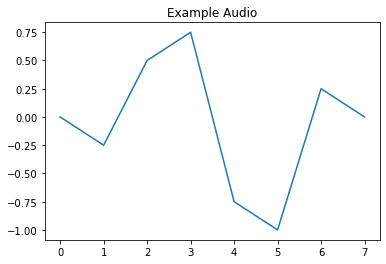

In [4]:
digital_audio = np.array([0., -0.25, 0.5 , 0.75,  -0.75  ,  -1.,  0.25 ,  0.])
plt.plot(digital_audio)
plt.title("Example Audio")
plt.show()

In [5]:
qsound_qpam = qa.QuantumAudio('qpam')
qsound_qpam.load_input(digital_audio)

qsound_sqpam = qa.QuantumAudio('sqpam')
qsound_sqpam.load_input(digital_audio)

For this input, the QPAM representation will require:
         3 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.
For this input, the SQPAM representation will require:
         3 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


QuantumAudio

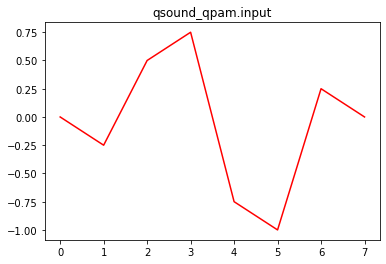

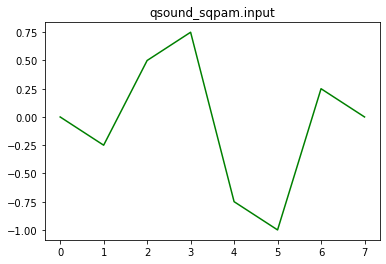

In [6]:
plt.plot(qsound_qpam.input, 'r')
plt.title('qsound_qpam.input')
plt.show()
plt.plot(qsound_sqpam.input, 'g')
plt.title('qsound_sqpam.input')
plt.show()

For this input, the QSM representation will require:
         3 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


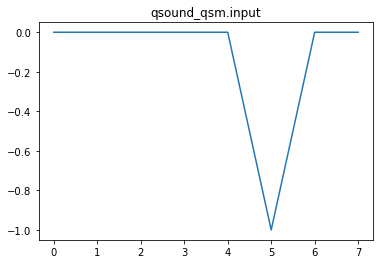

In [7]:
qsound_qsm = qa.QuantumAudio('qsm')
qsound_qsm.load_input(digital_audio)

plt.plot(qsound_qsm.input)
plt.title('qsound_qsm.input')
plt.show()

In [8]:
bit_depth=3
quantized_ditial_audio = digital_audio*(2**(bit_depth-1))

print(quantized_ditial_audio)

[ 0. -1.  2.  3. -3. -4.  1.  0.]


For this input, the QSM representation will require:
         3 qubits for encoding time information and 
         3 qubits for encoding ampĺitude information.


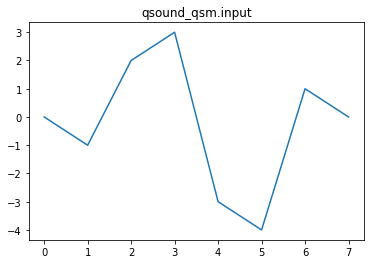

In [9]:
qsound_qsm = qa.QuantumAudio('qsm')
qsound_qsm.load_input(quantized_ditial_audio, 3)

plt.plot(qsound_qsm.input)
plt.title('qsound_qsm.input')
plt.show()

For this input, the QPAM representation will require:
         3 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.
For this input, the SQPAM representation will require:
         3 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


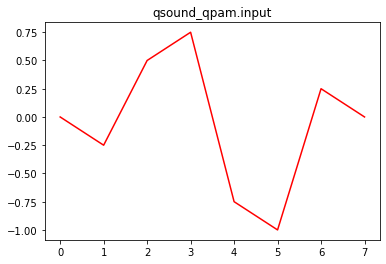

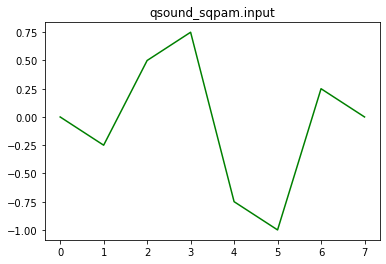

In [10]:
# qsound__qpam = qa.QuantumAudio('qpam')
qsound_qpam.load_input(quantized_ditial_audio, 3)

# qsound_sqpam = qa.QuantumAudio('sqpam')
qsound_sqpam.load_input(quantized_ditial_audio, 3)

plt.plot(qsound_qpam.input, 'r')
plt.title('qsound_qpam.input')
plt.show()
plt.plot(qsound_sqpam.input, 'g')
plt.title('qsound_sqpam.input')
plt.show()

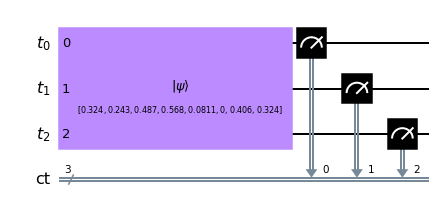

In [11]:
qsound_qpam.prepare()
qsound_qpam.measure()
qsound_qpam.circuit.draw('mpl')

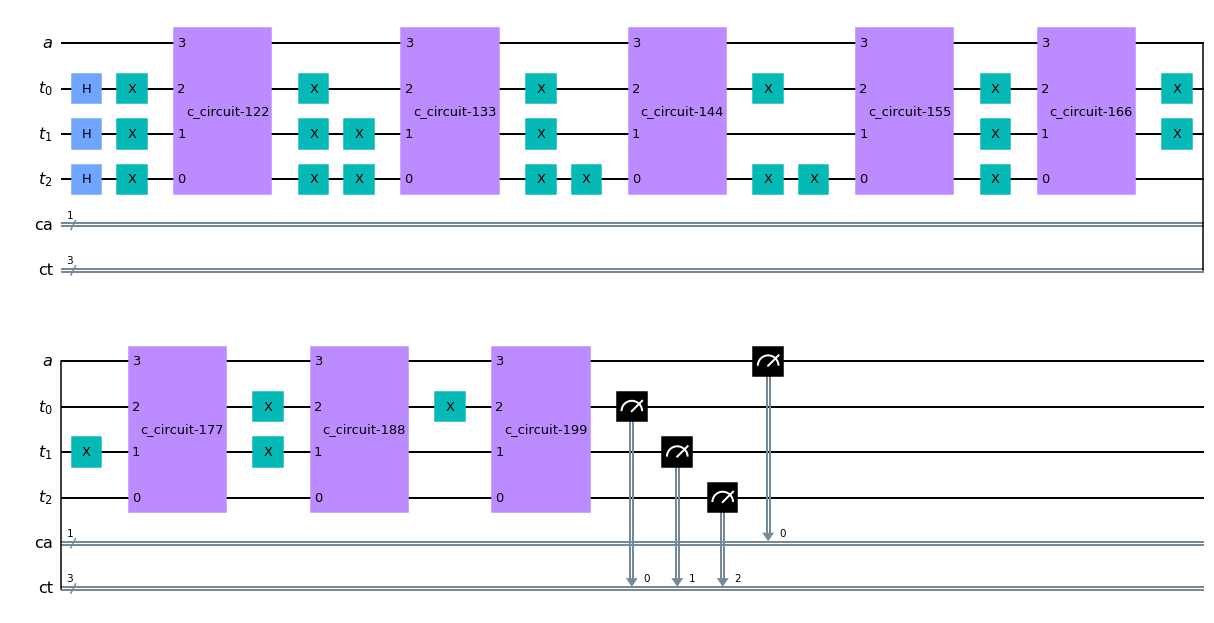

In [12]:
qsound_sqpam.prepare().measure().circuit.draw('mpl')

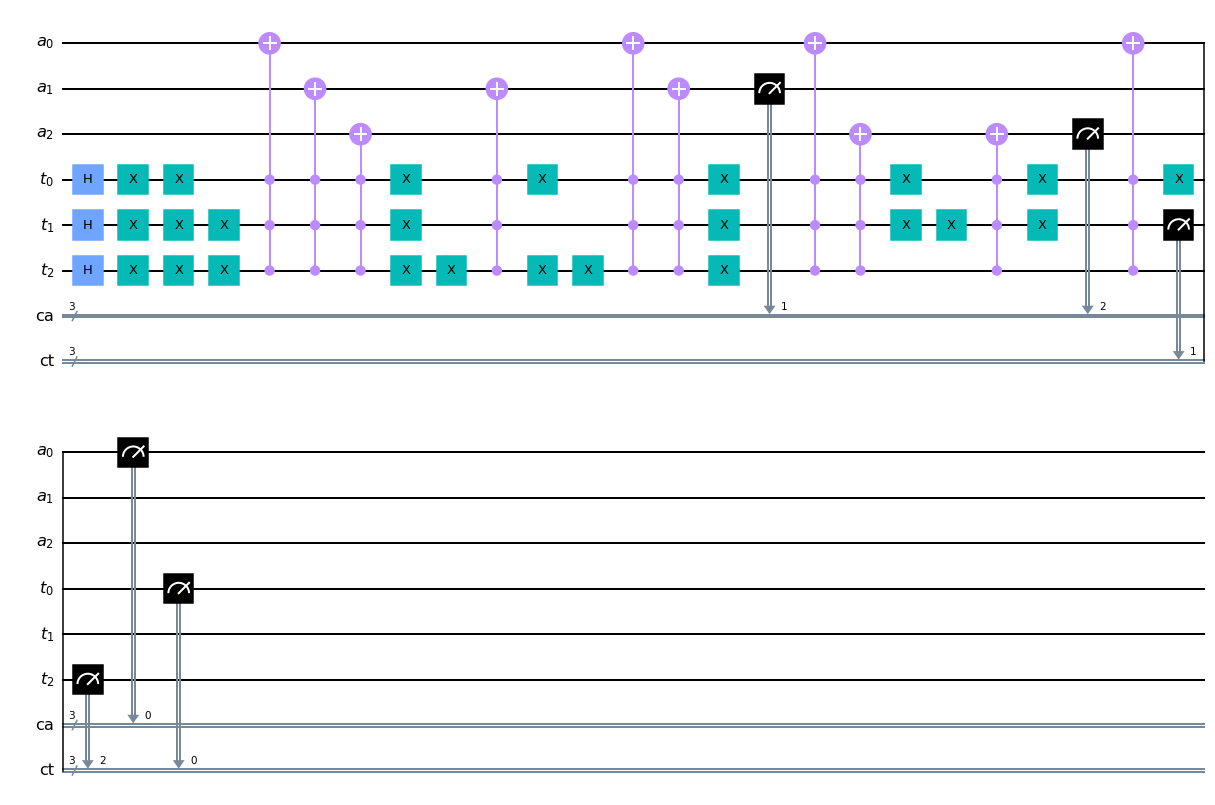

In [13]:
qsound_qsm.prepare().measure().circuit.draw('mpl')

Result(backend_name='aer_simulator', backend_version='0.12.0', qobj_id='', job_id='b10fd0f4-38f5-43e2-a670-f1cff7bc2021', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 304, '0x7': 109, '0x0': 117, '0x2': 246, '0x4': 7, '0x1': 54, '0x6': 163}), header=QobjExperimentHeader(creg_sizes=[['ct', 3]], global_phase=0.0, memory_slots=3, metadata=None, n_qubits=3, name='circuit-120', qreg_sizes=[['t', 3]]), status=DONE, seed_simulator=2298081710, metadata={'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000565208, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'device': 'CPU', 'active_input_qubits': [0, 1, 2], 'measure_sampling': True, 'num_clbits': 3, 'input_qubit_map': [[0, 0], [1, 1], [2, 2]], 'num_qubits': 3, 'method': 'statevector', 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.005538709)], date=2023-06-

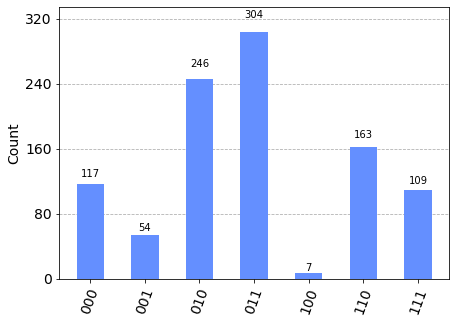

In [14]:

# Simulating qsound_qpam.circuit in 'aer_simulator' with 1 thousand shots:
shots = 1000
qsound_qpam.run(shots)
print(qsound_qpam.result)
print('-----------------------------------')
print(qsound_qpam.counts)
plot_histogram(qsound_qpam.counts)


{'100 1': 14, '010 0': 31, '110 0': 33, '000 0': 60, '101 0': 131, '110 1': 88, '111 1': 70, '011 1': 97, '000 1': 56, '001 1': 57, '001 0': 101, '011 0': 11, '010 1': 97, '100 0': 101, '111 0': 53}


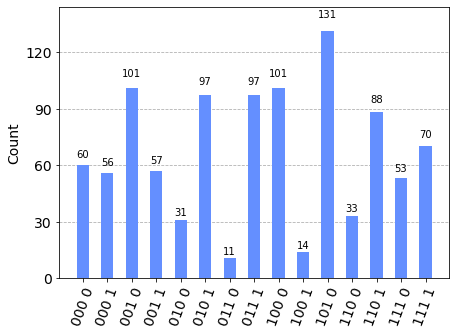

In [15]:
qsound_sqpam.run(shots)
print(qsound_sqpam.counts)
plot_histogram(qsound_sqpam.counts)

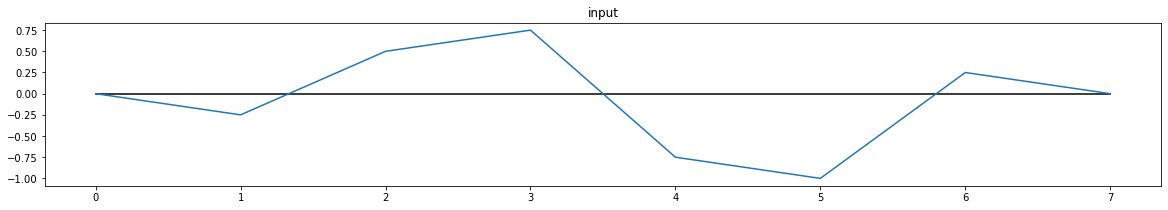

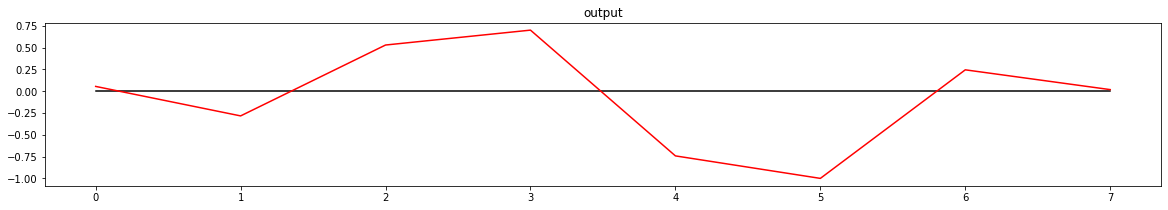

In [16]:
qsound_qpam.reconstruct_audio()
qsound_qpam.plot_audio()

In [17]:
qsound_qpam.output

array([ 0.054277  , -0.28375982,  0.52872496,  0.69941166, -0.74212406,
       -1.        ,  0.2443874 ,  0.0175952 ])

In [18]:
qsound_qpam.input

array([ 0.  , -0.25,  0.5 ,  0.75, -0.75, -1.  ,  0.25,  0.  ])

In [19]:
sum(qsound_qpam.output - qsound_qpam.input)

0.018512351480768685

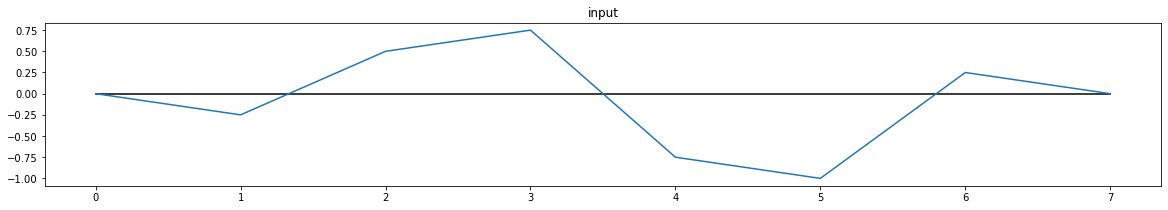

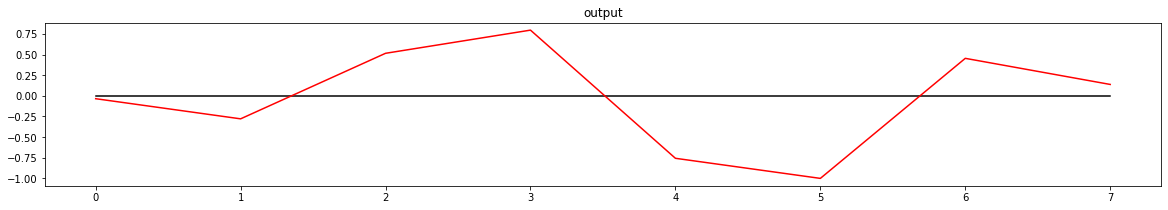

In [20]:
qsound_sqpam.reconstruct_audio()
qsound_sqpam.plot_audio()

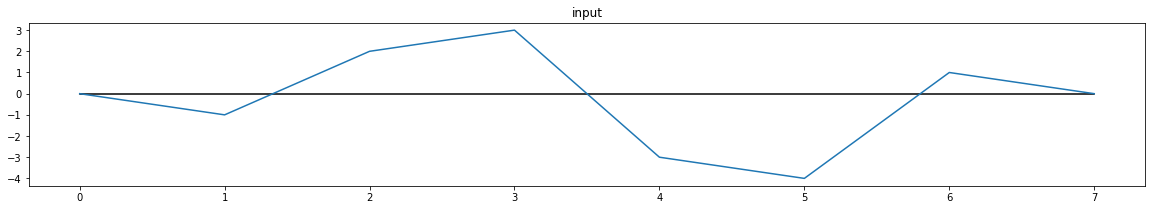

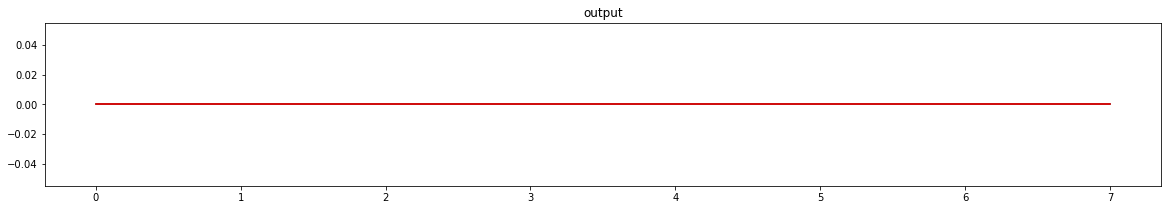

In [21]:
qsound_qsm.reconstruct_audio()
qsound_qsm.plot_audio()

In [22]:
sample_rate = 3000
qsound_qpam.listen(sample_rate)

For this input, the QPAM representation will require:
         3 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.


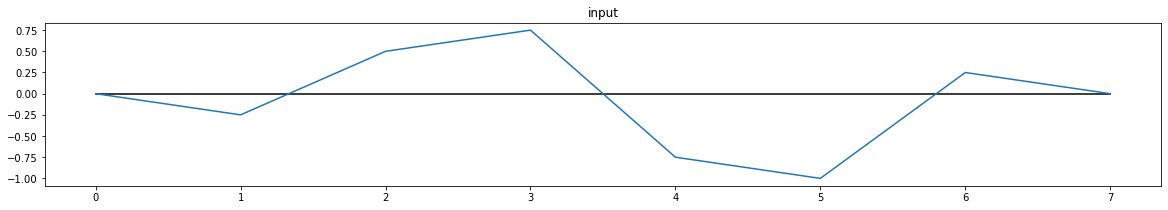

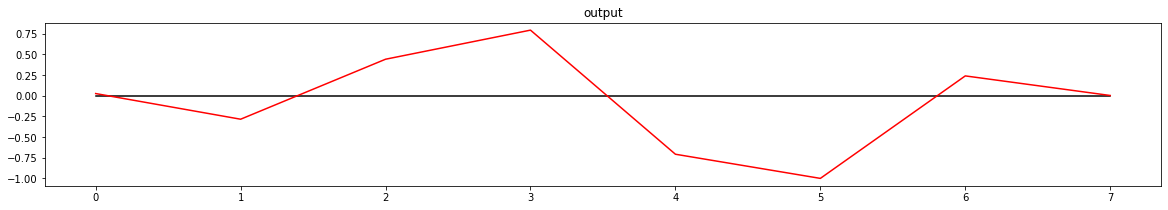

In [23]:
qsound = qa.QuantumAudio('qpam')
qsound.load_input(quantized_ditial_audio, 3).prepare().measure().run(1000).reconstruct_audio().plot_audio()